# 데이터 시각화

## Matplotlib
https://matplotlib.org

In [1]:
import matplotlib

In [11]:
#여러 오류를 만날 수 있기에 무시하기 위해 지정함
import warnings
warnings.filterwarnings("ignore")

In [50]:
#한글을 쓰기 위해 지정하기 위한 폰트 검색
import matplotlib.font_manager as fm

for i in fm.fontManager.ttflist:
    if i.name.find("Noto") != -1:    #Gulim, Gothic ...
        print(i.name)

Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR


In [47]:
# matplotlib에 사용할 기본 폰트를 지정
from matplotlib import rcParams
rcParams["font.family"] = "Noto Sans KR"
rcParams["axes.unicode_minus"] = False #축에 음수 표현안되면, False 처리해줌

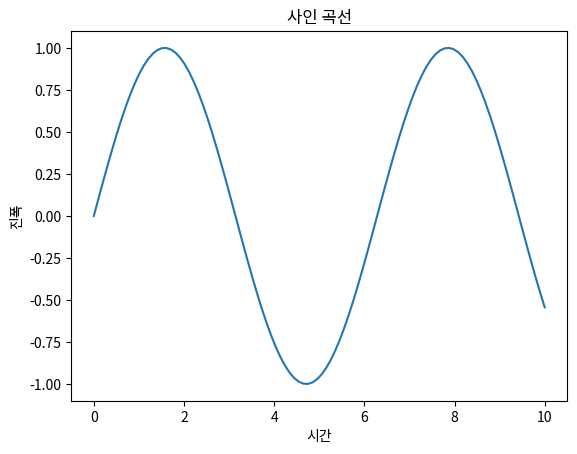

In [48]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,10,100)
y = np.sin(x)

plt.plot(x,y)
plt.title("사인 곡선")
plt.xlabel("시간")
plt.ylabel("진폭")
plt.show()

## 1. 데이터 시각화의 중요성

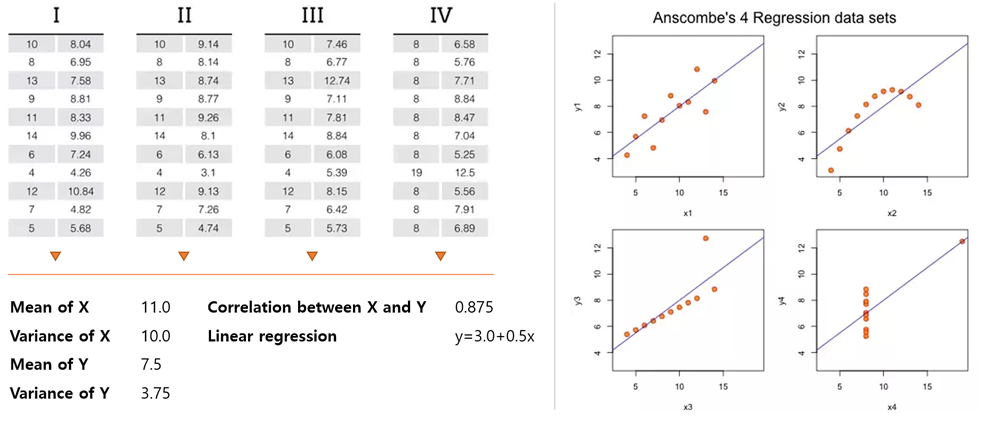

In [53]:
import seaborn as sns
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


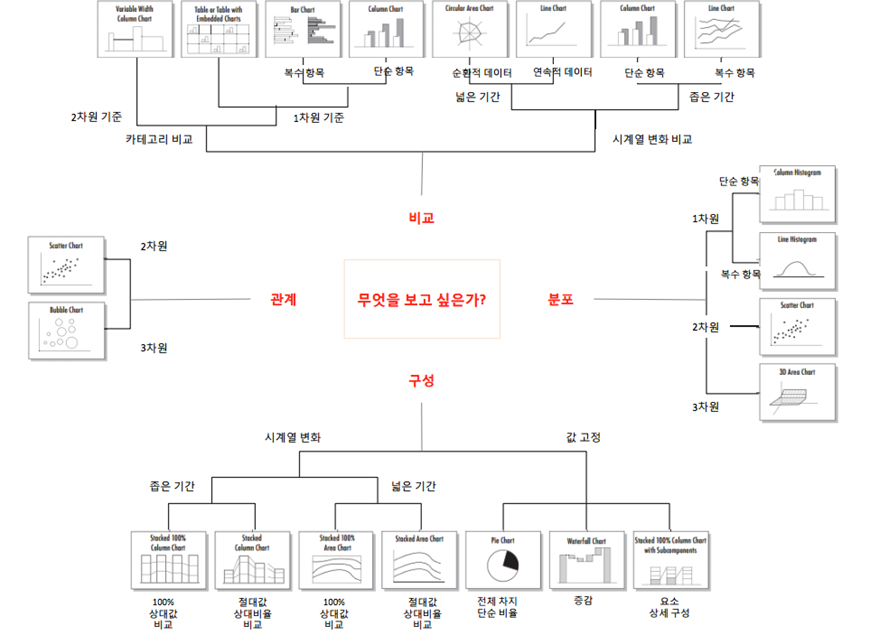
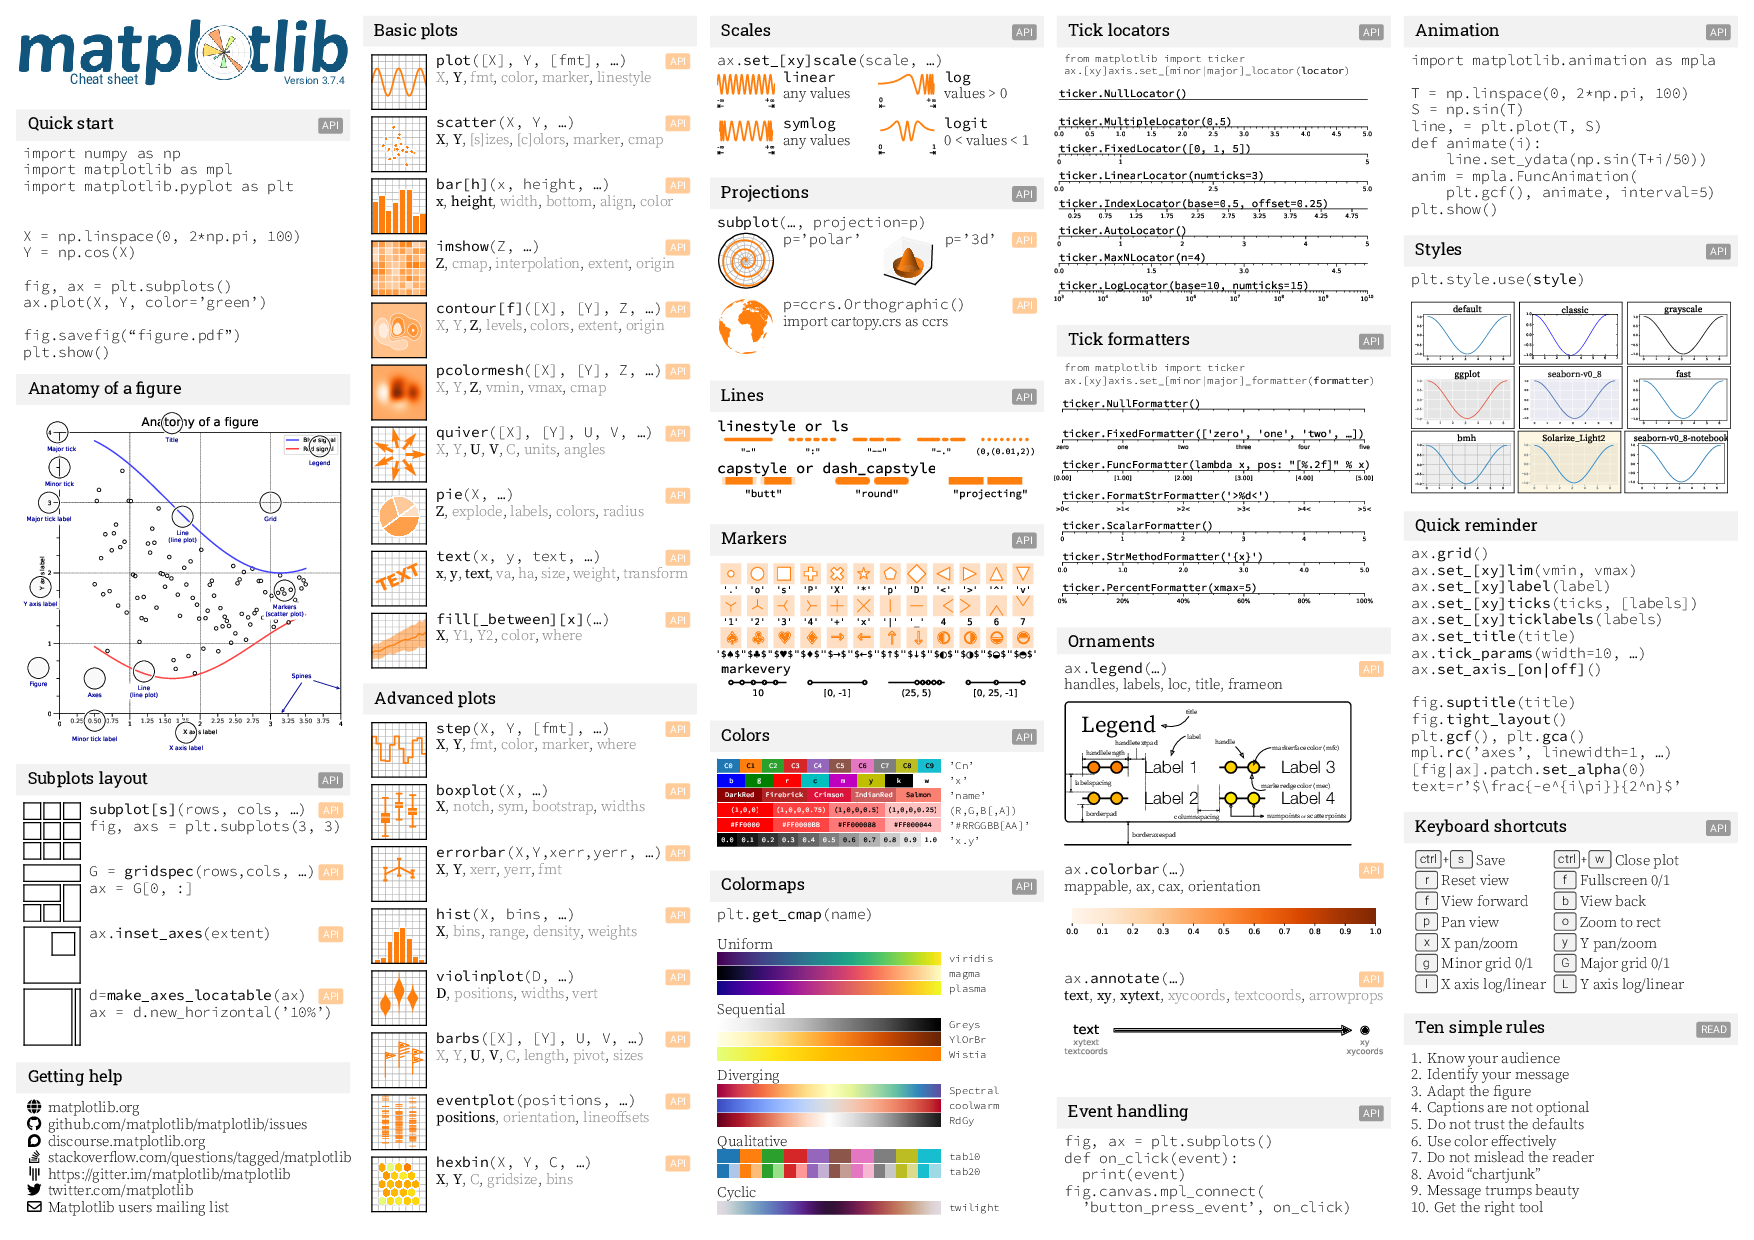
https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png

In [57]:
anscombe["dataset"].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

## 2. Matplotlib 라이브러리

[]

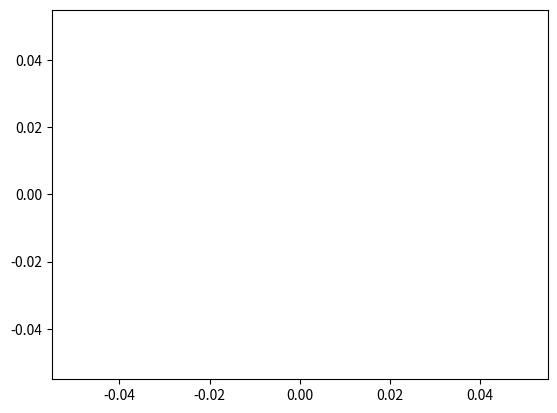

In [58]:
import matplotlib.pyplot as plt
plt.plot()

In [76]:
d1 = anscombe[anscombe["dataset"] ==  "I"]
d2 = anscombe[anscombe["dataset"] == "II"]
d3 = anscombe[anscombe["dataset"] == "III"]
d4 = anscombe[anscombe["dataset"] == "IV"]

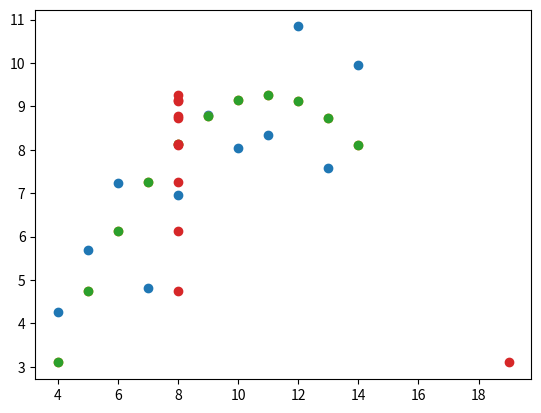

In [85]:
plt.plot(d1["x"], d1["y"], "o")
plt.plot(d2["x"], d2["y"], "o")
plt.plot(d3["x"], d2["y"], "o")
plt.plot(d4["x"], d2["y"], "o")
plt.show()

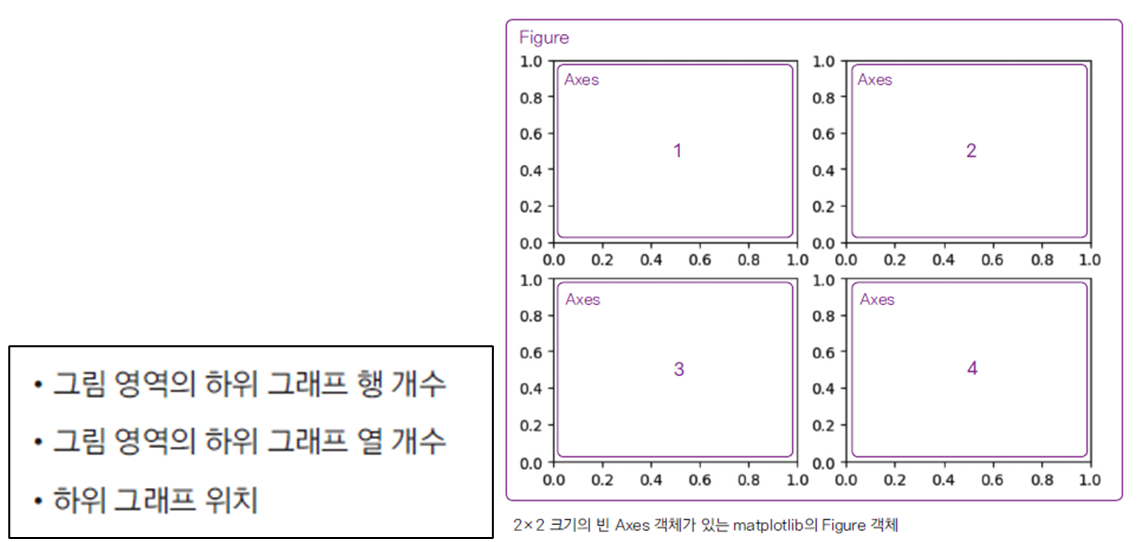

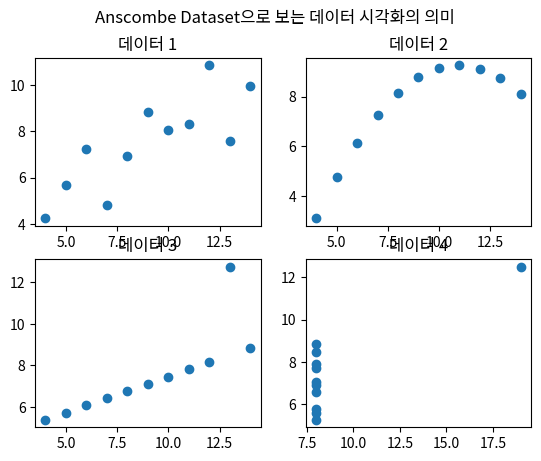

In [129]:
#차트를 한 영역 안에 비교할 수 있도록 모아놓는 기능
fig = plt.figure()

fig.suptitle("Anscombe Dataset으로 보는 데이터 시각화의 의미")

fig.set_tight_layout = True


axes1 = fig.add_subplot(2,2,1) #2 row, 2 col position
axes1.plot(d1["x"],d1["y"], "o")
axes1.set_title("데이터 1")

axes2 = fig.add_subplot(2,2,2)
axes2.plot(d2["x"], d2["y"], "o")
axes2.set_title("데이터 2")

axes3 = fig.add_subplot(2,2,3)
axes3.plot(d3["x"], d3["y"], "o") #이상치(outlier)가 존재함
axes3.set_title("데이터 3")

axes4 = fig.add_subplot(2,2,4)
axes4.plot(d4["x"], d4["y"], "o") #이상치(outlier)가 존재함
axes4.set_title("데이터 4")
plt.show()

데이터를 요약한 통계만으로 판단하는 것은 완전하지 않기에,

시각화를 통해 경향을 파악하는 것이 중요하다.

새로운 데이터 셋
- tips : 팁, 청구서 전체 금액, 일행수, 요일, 시간, 흡연여부, 성별

In [130]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. 일변량 그래프(변수 하나만 가지고 그리는 그래프)
- 히스토그램 : 구간의 ***빈도수***를 시각화하는 그래프  
  x의 구간을 나누어, y는 빈도수
  연속형 변수의 구간별 분포를 나타내는 그래프

- 막대그래프 : 구간이 연속이 아니고, 이산형임

- 상자그램(boxplot) : 연속형 변수의 분포를 나타내는 그래프(최소/Q1/Q2/Q3/최대)

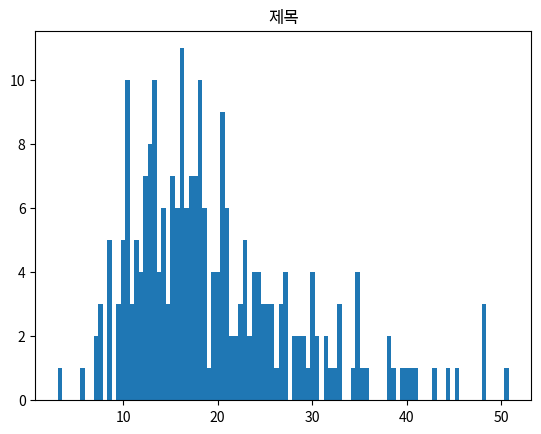

In [153]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.hist(data = tips, x = "total_bill", bins = 100) #bin은 막대기 숫자
axes.set_title("제목")
plt.show()

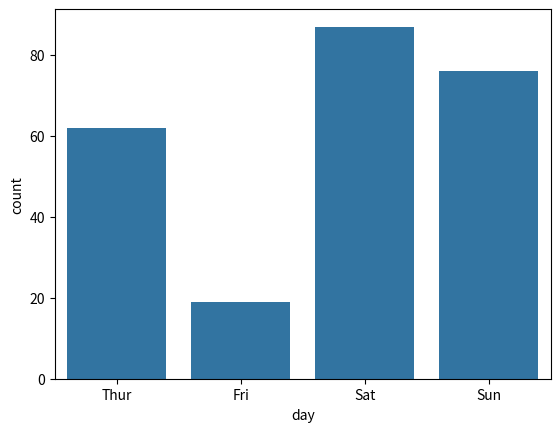

In [161]:
#막대 그래프는 seaborn에서 많이함
sns.countplot(data = tips, x = "day")
plt.show()

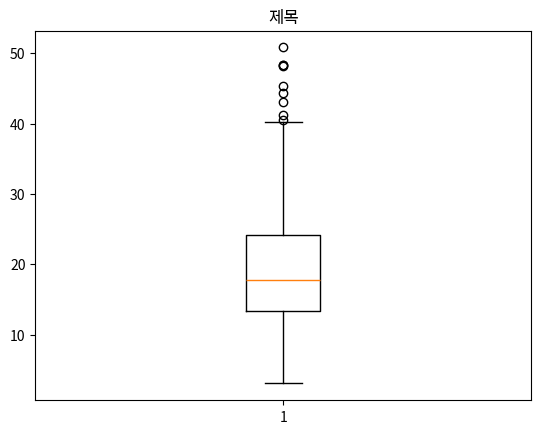

In [300]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.boxplot(data = tips, x = "total_bill")
axes.set_title("제목")
plt.show()

#boxplot의 이상치는 기계적으로 알아서 중앙의 1.5배 곱해서 찾아내줌

## 2. 이변량 그래프

### 산점도(scatter plot)
- 2차원 데이터, 두 변수의 상관관계 표현
- 좌표계의 평면에 데이터를 점으로 표현하는 그래프
- 이상치 확인 쉬움
- 점 하나의 위치는 데이터 하나의 x, y값

### 상자 그림


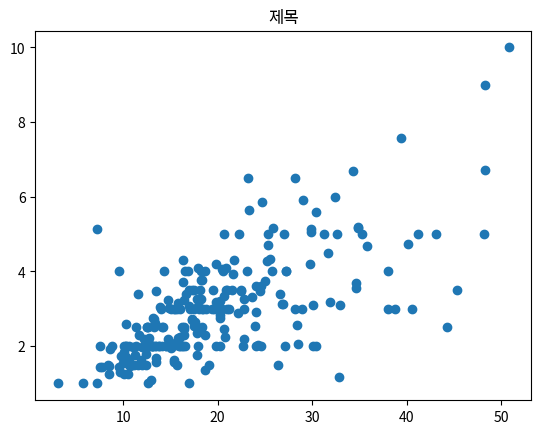

In [168]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.scatter(x = tips["total_bill"], y= tips["tip"]) #총 지불금액과 팁의 관계 => 상관관계
axes.set_title("제목")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24d1c3f3320>,
 'caps': [<matplotlib.lines.Line2D at 0x24d1c3f0410>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d1c3f39b0>,
 'medians': [<matplotlib.lines.Line2D at 0x24d1c5639b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24d1c563b90>,
 'means': []}

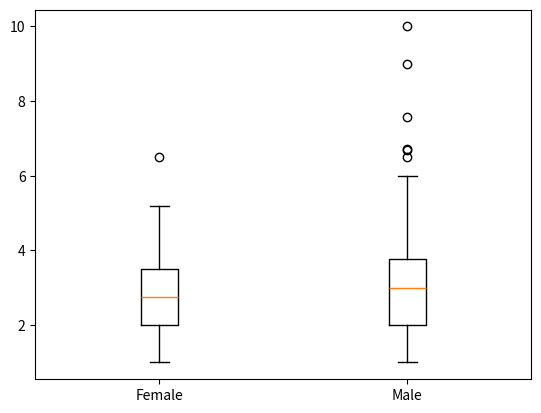

In [193]:
#상자 그림
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.boxplot(
    x=[  tips[tips['sex'] == 'Female' ]['tip'],
         tips[tips['sex'] == 'Male'   ]['tip']
      ], 
    labels=['Female','Male']
) 

## 3. 다변량 그래프

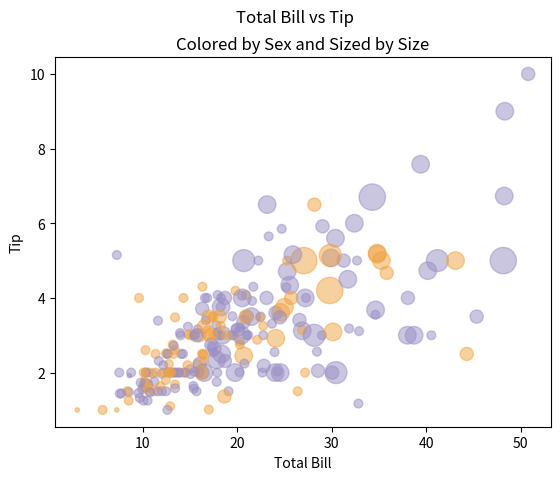

In [199]:
#map()함수에 사용
colors = {"Female": "#f1a340", "Male": "#998ec3"}
# 성별에 따른 색상을 지정, 여성은 주황색, 남성은 보라색 
#16진수 코드는 https://www.w3schools.com/colors/colors_picker.asp 에서 확인 가능

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)

axes1.scatter(data=tips,
              x='total_bill',
              y='tip',
              s=tips['size']**2*10,# size를 제곱하여 점의 크기를 키움, s는 점의 크기를 나타내는 매개변수
              c=tips['sex'].map(colors),# map()은 Series의 각 요소에 대해 특정 함수를 적용할 때 사용, c는 점의 색을 나타내는 매개변수, colors 딕셔너리에 따라 여성은 주황색, 남성은 보라색
              alpha=0.5) # alpha는 점의 투명도를 나타내는 매개변수

axes1.set_title('Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

scatter_plot.suptitle('Total Bill vs Tip')

plt.show()

# 3. Seaborn 라이브러리
https://seaborn.pydata.org/tutorial/color_palettes.html

<Axes: xlabel='total_bill', ylabel='tip'>

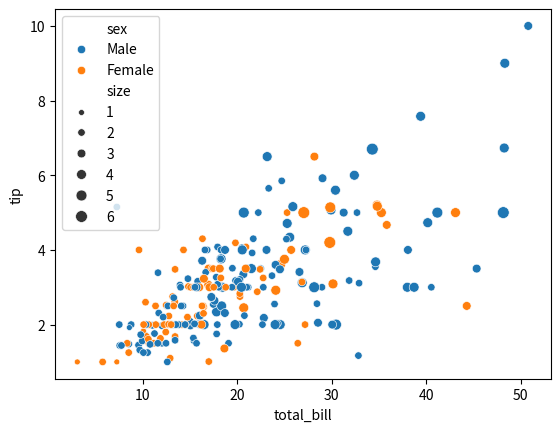

In [203]:
df = tips
import seaborn as sns
sns.scatterplot(
    x = df["total_bill"],
    y = df["tip"],
    hue = df["sex"],
    size = df["size"]
)

In [205]:
#seaborn의 데이터셋
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 일변량 그래프

<Axes: xlabel='total_bill', ylabel='Count'>

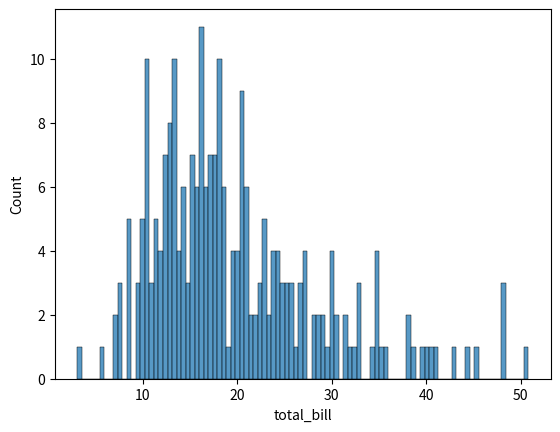

In [207]:
sns.histplot(data = tips, x= "total_bill", bins = 100)

<function matplotlib.pyplot.show(close=None, block=None)>

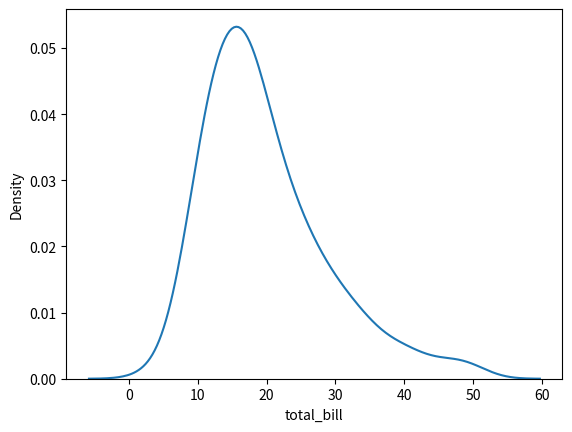

In [213]:
#밀도 분포 그래프
sns.kdeplot(data = tips, x = "total_bill")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

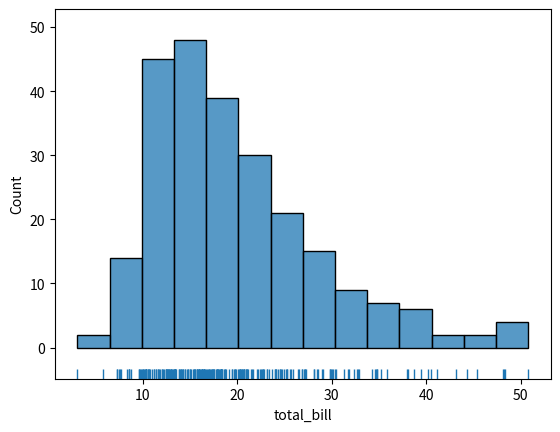

In [216]:
sns.rugplot(data = tips, x = "total_bill")
sns.histplot(data = tips, x= "total_bill")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

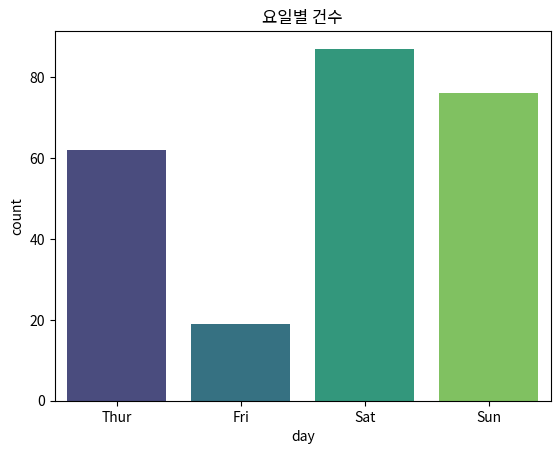

In [226]:
trash, ax = plt.subplots() #subplots은 튜플로 제공하기에, 언패킹 나머지 하나를 받아줘야함
sns.countplot(data= tips, x = "day", palette = "viridis")
ax.set_title("요일별 건수")

plt.show



### 이변량 그래프

<function matplotlib.pyplot.show(close=None, block=None)>

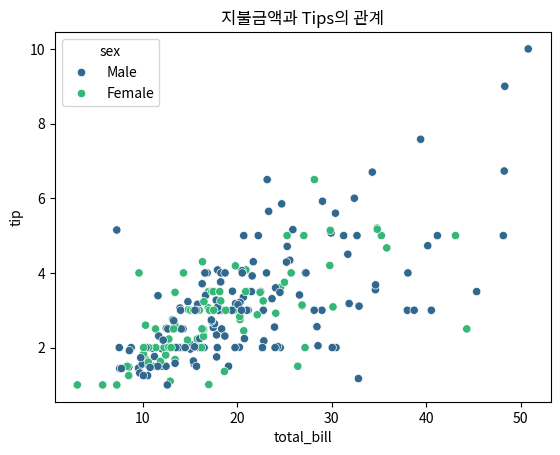

In [230]:
trash, ax = plt.subplots() #subplots은 튜플로 제공하기에, 언패킹 나머지 하나를 받아줘야함
sns.scatterplot(data = tips, x = "total_bill", y= "tip", ax = ax, hue = "sex", palette = "viridis")
ax.set_title("지불금액과 Tips의 관계")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

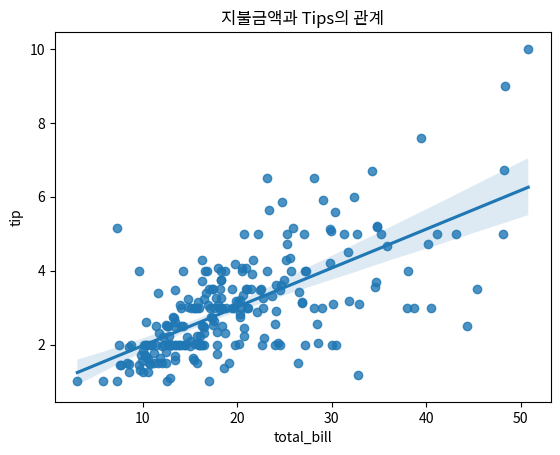

In [234]:
trash, ax = plt.subplots() #subplots은 튜플로 제공하기에, 언패킹 나머지 하나를 받아줘야함
sns.regplot(data = tips, x = "total_bill", y= "tip", ax = ax)
ax.set_title("지불금액과 Tips의 관계")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

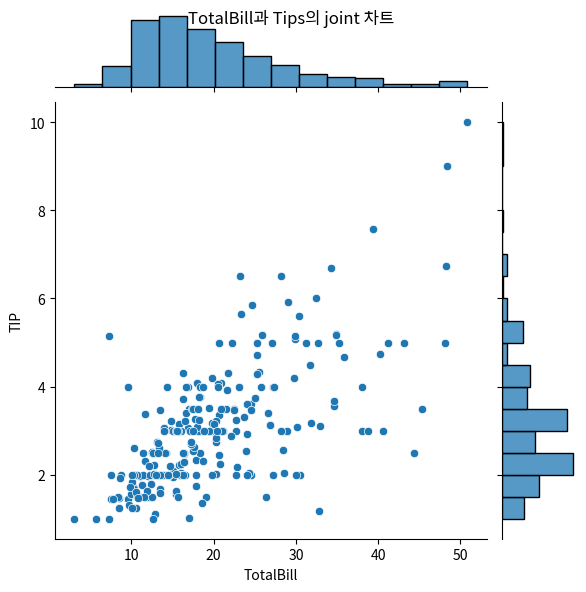

In [240]:
#joint plot
joint = sns.jointplot(data = tips, x = "total_bill", y= "tip")
joint.set_axis_labels(xlabel = "TotalBill", ylabel = "TIP")
joint.figure.suptitle("TotalBill과 Tips의 joint 차트")
plt.show

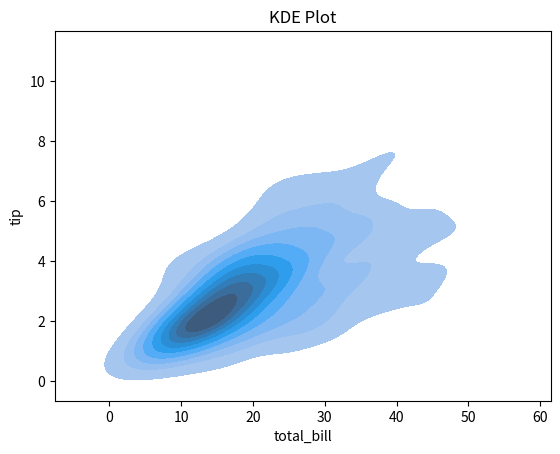

In [244]:
kde, ax = plt.subplots()
sns.kdeplot(data = tips, x = "total_bill", y = "tip", fill = True, ax = ax)
ax.set_title("KDE Plot")
plt.show()

In [246]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


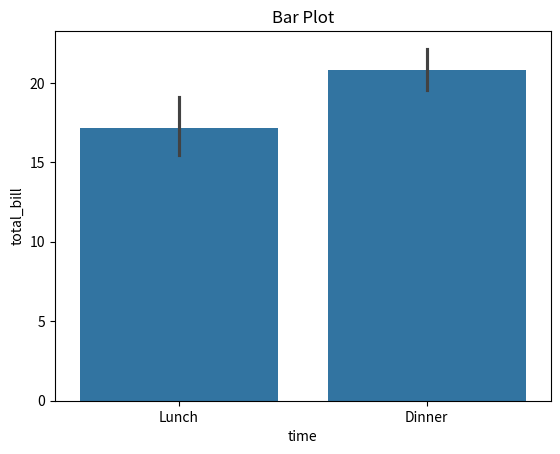

In [257]:
#bar-plots
kde, ax = plt.subplots()
sns.barplot(data = tips, x = "time", y = "total_bill", estimator = np.mean, ax = ax)
#x에 범주형 변수, y에 연속형 변수
ax.set_title("Bar Plot")
plt.show()

#차트에 보이는 검은색 세로선은 값의 신뢰구간을 보여줌

<function matplotlib.pyplot.show(close=None, block=None)>

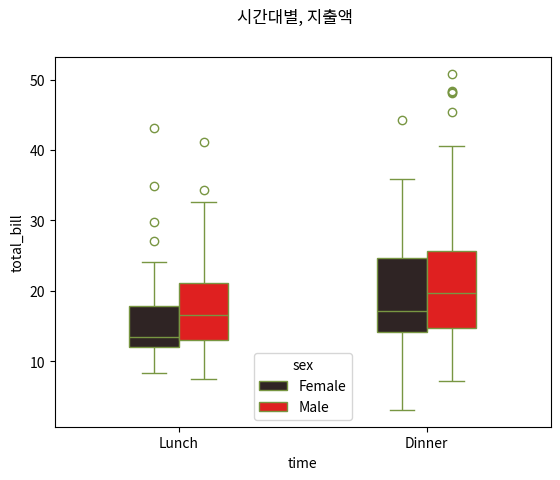

In [295]:
cnt, ax = plt.subplots()
sns.boxplot(data = tips,
            x = "time",
            y = "total_bill",
            hue = "sex",
            hue_order = ["Female","Male"],
            linecolor = "#789642",
            color = "red",
            width = 0.4
           )
plt.suptitle("시간대별, 지출액")
plt.show

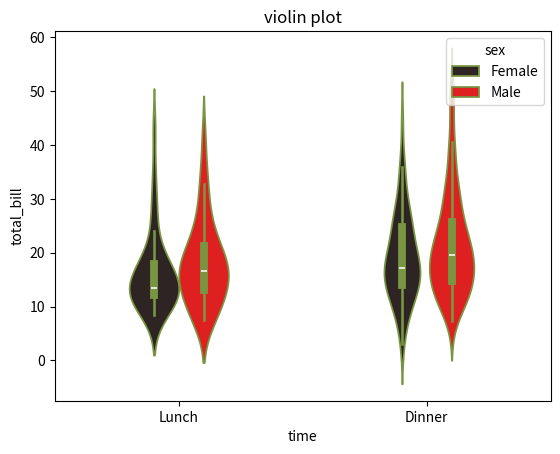

In [299]:
#violin plot
#바이올린 차트는 이상치를 다루지 않음
cnt, ax = plt.subplots()
sns.violinplot(data = tips,
            x = "time",
            y = "total_bill",
            hue = "sex",
            hue_order = ["Female","Male"],
            linecolor = "#789642",
            color = "red",
            width = 0.4
           )
ax.set_title("violin plot")
plt.show()

### 3. pairplot

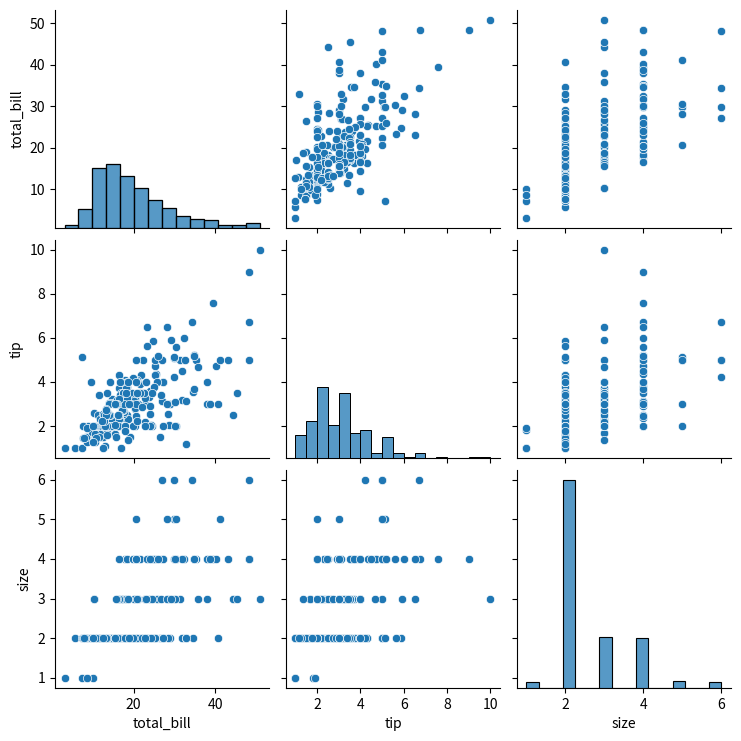

In [308]:
sns.pairplot(data=tips)
fig.figure.suptitle("Tips 데이터의 관계 분석")
plt.show()